In [2]:
import pandas as pd
import sys
import numpy as np
import pickle

%matplotlib notebook
from mpldatacursor import datacursor
from mpldatacursor import HighlightingDataCursor
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"

In [124]:
def plot_cases_percapita():
    '''country_name_options = ['Brazil','Chile','NSW','USA','USAbyStates']'''
    x = {}
    y = {}

    with open('results/x_brazil.pickle', 'rb') as handle:
        x_brazil = pickle.load(handle)
        x['Brazil'] = x_brazil
    with open('results/y_brazil.pickle', 'rb') as handle:
        y_brazil = pickle.load(handle)
        y['Brazil'] = y_brazil
    #with open('results/results_brazil.pickle', 'rb') as handle:
     #   results_brazil = pickle.load(handle)
      #  new_df_brazil = pd.read_csv('data/Generated_data/Brazildataset.csv')
       
    with open('results/x_chile.pickle', 'rb') as handle:
        x_chile = pickle.load(handle)
        x['Chile'] = x_chile
    with open('results/y_chile.pickle', 'rb') as handle:
        y_chile = pickle.load(handle)
        y['Chile'] = y_chile

    with open('results/x_NSW.pickle', 'rb') as handle:
        x_NSW = pickle.load(handle)
        x['NSW'] = x_NSW
    with open('results/y_NSW.pickle', 'rb') as handle:
        y_NSW = pickle.load(handle)
        y['NSW'] = y_NSW

    with open('results/x_USA.pickle', 'rb') as handle:
        x_USA = pickle.load(handle)
        x['USA'] = x_USA
    with open('results/y_USA.pickle', 'rb') as handle:
        y_USA = pickle.load(handle)
        y['USA'] = y_USA
        
    with open('results/x_USA_states.pickle', 'rb') as handle:
        x_states = pickle.load(handle)
        x['USA by states'] = x_states
    with open('results/y_USA_states.pickle', 'rb') as handle:
        y_states = pickle.load(handle)
        y['USA by states'] = y_states

        
    fig, ax1 = plt.subplots(figsize=(6,6))
    plt.xscale("log")
    plt.yscale("log")
    

    plt.xlabel("Population")
    plt.ylabel("Cases per capita")
    #ax2 = ax1.twinx()
    #ax1.get_shared_y_axes().join(ax1, ax2)
    
    plt.xscale("log")
    plt.yscale("log")
    #slope, intercept = np.polyfit(np.log(x), np.log(x), 1)
    #ax2.plot(x,x, '-', label = 'y = x, {}'.format(slope))
    
    #x* total y/ total x
    #Percapita = population of city[i] * (total cases)/(total population)
    for name, var in x.items():
        x = x[name]
        y = y[name]
        slope, intercept = np.polyfit(np.log(x*(sum(y)/sum(x))), np.log(x), 1)
        plt.plot(x, x*(sum(y)/sum(x)), 
                 label =name, 
                 alpha = 0.7, color = 'orange')
    
    plt.suptitle('Per-capita cases', fontsize=16)
    #plt.title(title_name)
    plt.legend()
    plt.tight_layout()
    #datacursor(formatter='{label}'.format, display='multiple', draggable=True)
    plt.show()

In [183]:
def plot_results(country_name):
    '''country_name_options = ['Brazil','Chile','NSW','USA','USAbyStates']'''
    
    if country_name == 'Brazil':
        with open('results/x_brazil.pickle', 'rb') as handle:
            x = pickle.load(handle)
        with open('results/y_brazil.pickle', 'rb') as handle:
            y = pickle.load(handle)
        with open('results/results_brazil.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv('data/Generated_data/Brazildataset.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases per city against population in log scale'
        
    elif country_name == 'Chile':
        with open('results/x_chile.pickle', 'rb') as handle:
            x = pickle.load(handle)
        
        with open('results/y_chile.pickle', 'rb') as handle:
            y = pickle.load(handle)

        with open('results/results_chile.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv('data/Generated_data/Chiledataset.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases per comuna against population in log scale'
        
    elif country_name == 'NSW':
        with open('results/x_NSW.pickle', 'rb') as handle:
            x = pickle.load(handle)
        
        with open('results/y_NSW.pickle', 'rb') as handle:
            y = pickle.load(handle)

        with open('results/results_NSW.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv('data/Generated_data/NSWdataset26Oct.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases per SUA/SA2/LGA against population in log scale'
        
    elif country_name == 'USA':
        with open('results/x_USA.pickle', 'rb') as handle:
            x = pickle.load(handle)

        with open('results/y_USA.pickle', 'rb') as handle:
            y = pickle.load(handle)

        with open('results/results_USA.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv('data/Generated_data/USAdataset.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases by county against population in log scale'
        
    elif country_name == 'USAbyStates':
        with open('results/x_USA_states.pickle', 'rb') as handle:
            x = pickle.load(handle)
        with open('results/y_USA_states.pickle', 'rb') as handle:
            y = pickle.load(handle)
        with open('results/results_USA_states.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv('data/Generated_data/USAdatasetstate.csv')
        suptitle_name = 'USA'
        title_name = 'COVID-19 cases by state against population in log scale'
        
    fig, ax1 = plt.subplots(figsize=(6,6))
    plt.xscale("log")
    plt.yscale("log")
    
    names = new_df.loc[:, 'cities'].values
    i = 0
    for n in range(len(x)):   
        m = (new_df['population'] == x[i]) & (new_df['cases'] == y[i])
        name = new_df[m]['cities'].item()
        plt.plot(x[i], y[i], "o", ms=2,color="k", alpha = 0.3, label= name)
        i += 1

    plt.xlabel("Population")
    plt.ylabel("Cases")
    ax2 = ax1.twinx()
    ax1.get_shared_y_axes().join(ax1, ax2)
    
    plt.xscale("log")
    plt.yscale("log")

    #x* total y/ total x
    #Percapita = population of city[i] * (total cases)/(total population)
    slope, intercept = np.polyfit(np.log(x*(sum(y)/sum(x))), np.log(x), 1)
    ax2.plot(x, x*(sum(y)/sum(x)), 
             label =r'Percapita cases, $\beta={}$'+str(round(slope,2)), 
             alpha = 0.7, color = 'orange')
    
    y_y = np.exp(results['LS'] [2])*x**results['LS'][0]
    err_LS = results['LS'][1]
    ax2.plot(x, y_y,
             "-", ms=2,color="tomato",alpha = 0.7,
             label=r"Least Square fit, $\beta=$"+str(results['LS'][0])[:4]+r"$\pm$"
             +'{:.2f}'.format(err_LS))
    ax2.fill_between(x, (y_y - err_LS), 
                         (y_y + err_LS), color='tomato', alpha=.3)
    Y=np.sum(y)
    betaP=results['Pop']['params'][0]
    Z=np.sum(np.power(x,betaP))
    y_p = Y*x**betaP/Z
    err_P = results['Pop']['Beta +- error'][1]
    ax2.plot(x, y_p, "-", ms=2,color="limegreen", alpha = 0.7,
             label=r"Person's Model, $\beta=$"+str(betaP)[:4]+r"$\pm$"+'{:.2f}'.format(err_P))
    ax2.fill_between(x, (y_p - err_P), 
                         (y_p + err_P), color='limegreen', alpha=.3)
    ax2.set_yticklabels([])
    ax2.legend(loc=0)
    plt.suptitle(suptitle_name, fontsize=16)
    plt.title(title_name)
    
    plt.tight_layout()
    datacursor(formatter='{label}'.format, display='multiple', bbox=dict(fc='white'),
               draggable=True)
    plt.show()

# Brazil

<IPython.core.display.Javascript object>


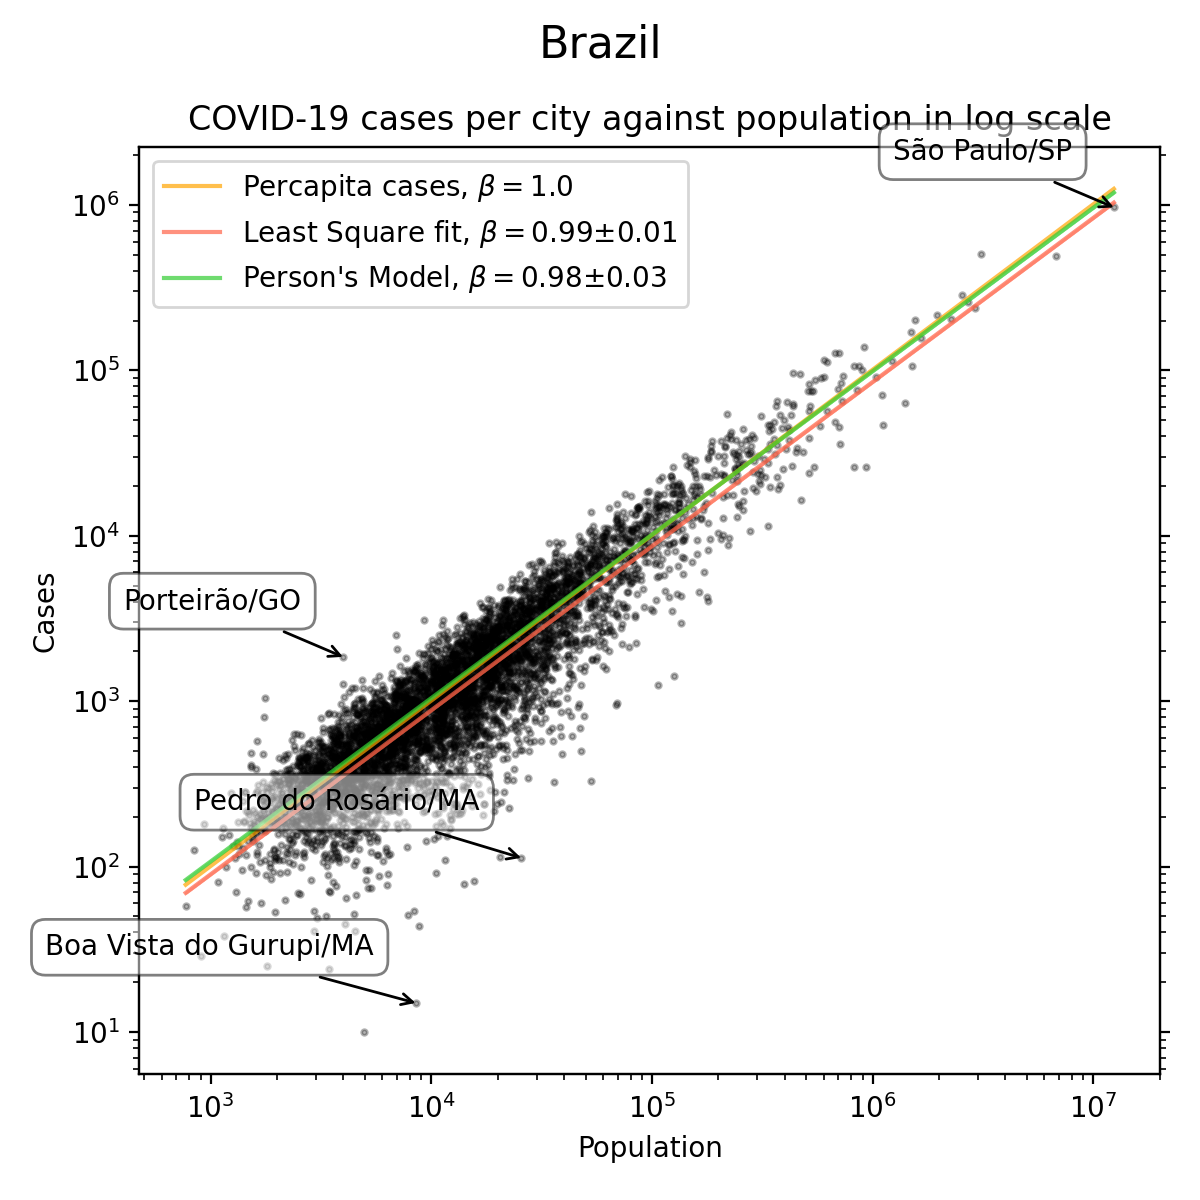

In [184]:
plot_results('Brazil')
plt.savefig('Brazil_Scaling_Law', dpi = 1000)

# Chile

<IPython.core.display.Javascript object>


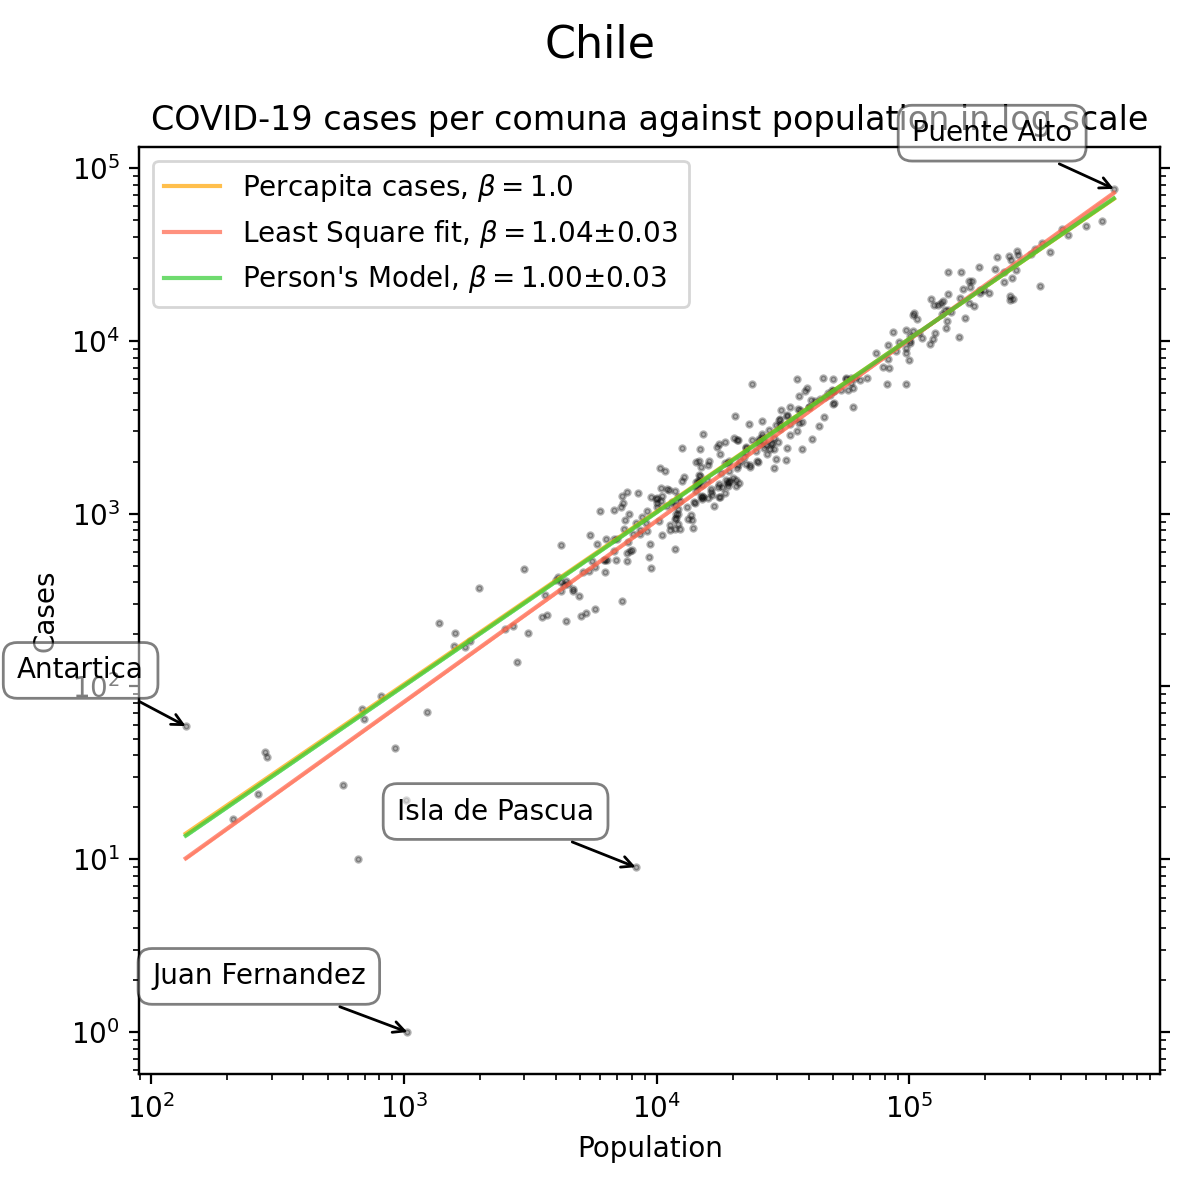

In [187]:
plot_results('Chile')
plt.savefig('Chile_Scaling_Law', dpi = 1000)

# NSW

<IPython.core.display.Javascript object>


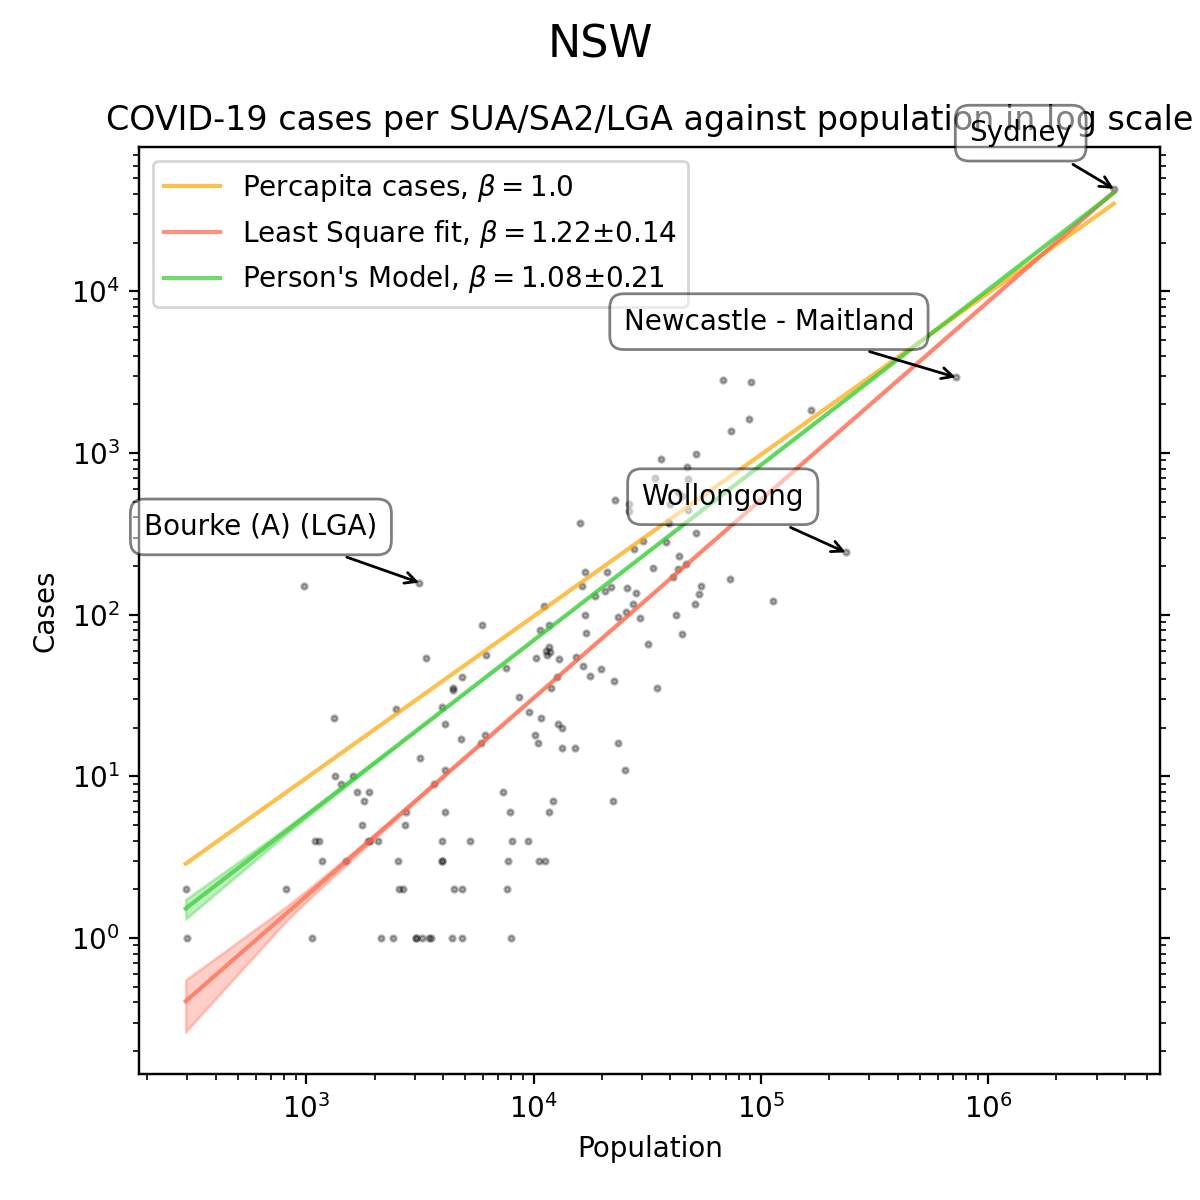

In [189]:
plot_results('NSW')
plt.savefig('NSW_Scaling_Law', dpi = 1000)

# USA by County

<IPython.core.display.Javascript object>


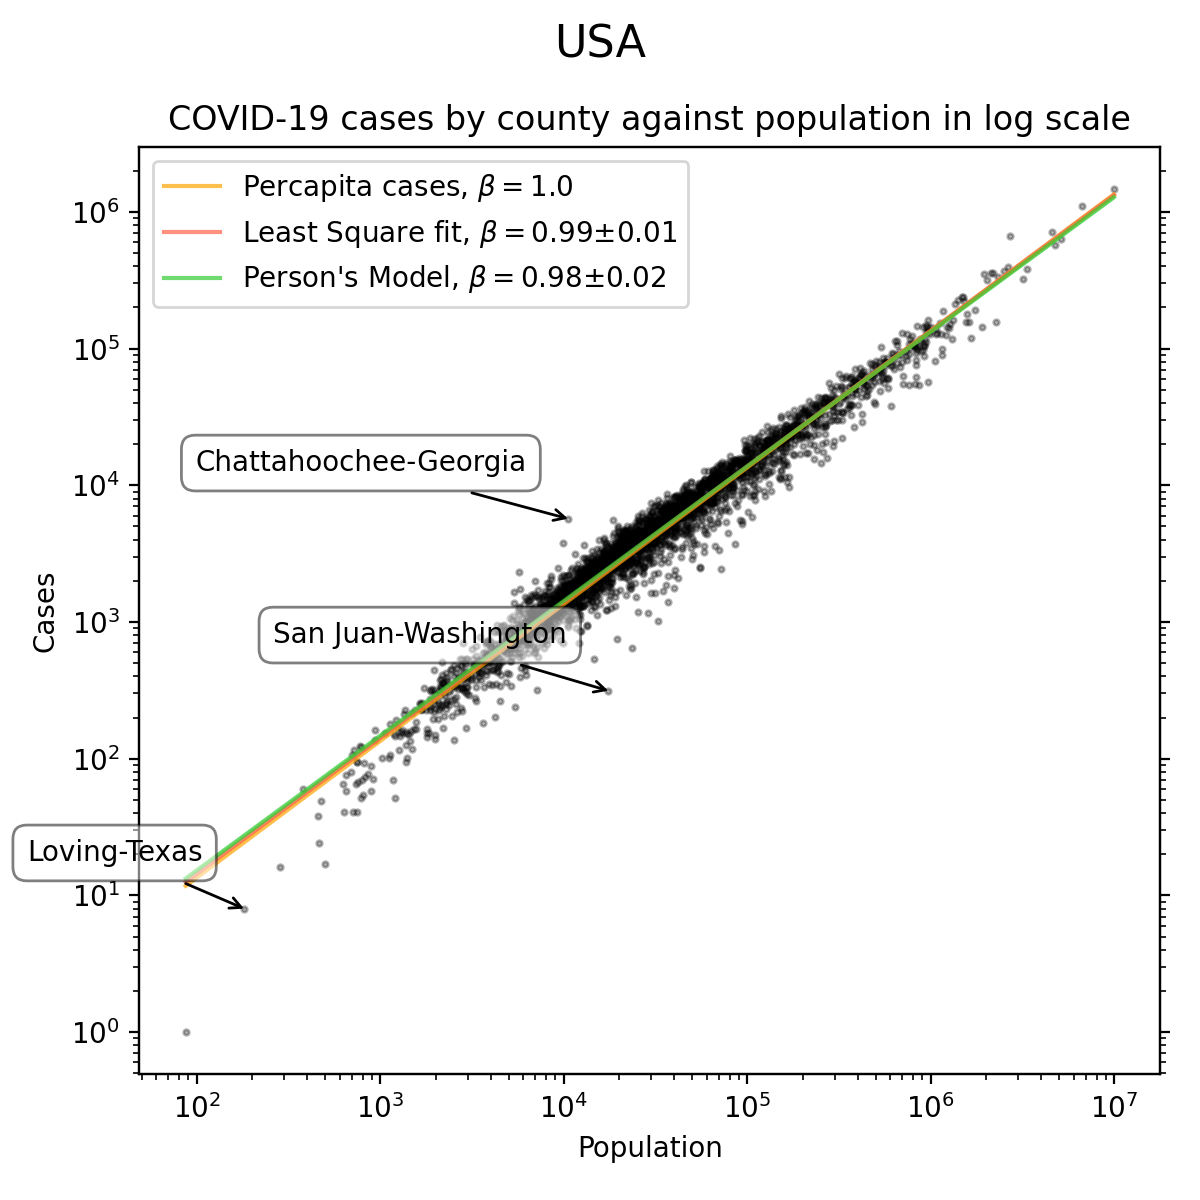

In [191]:
plot_results('USA')
plt.savefig('USA_Scaling_Law', dpi = 1000)

# USA by State

<IPython.core.display.Javascript object>


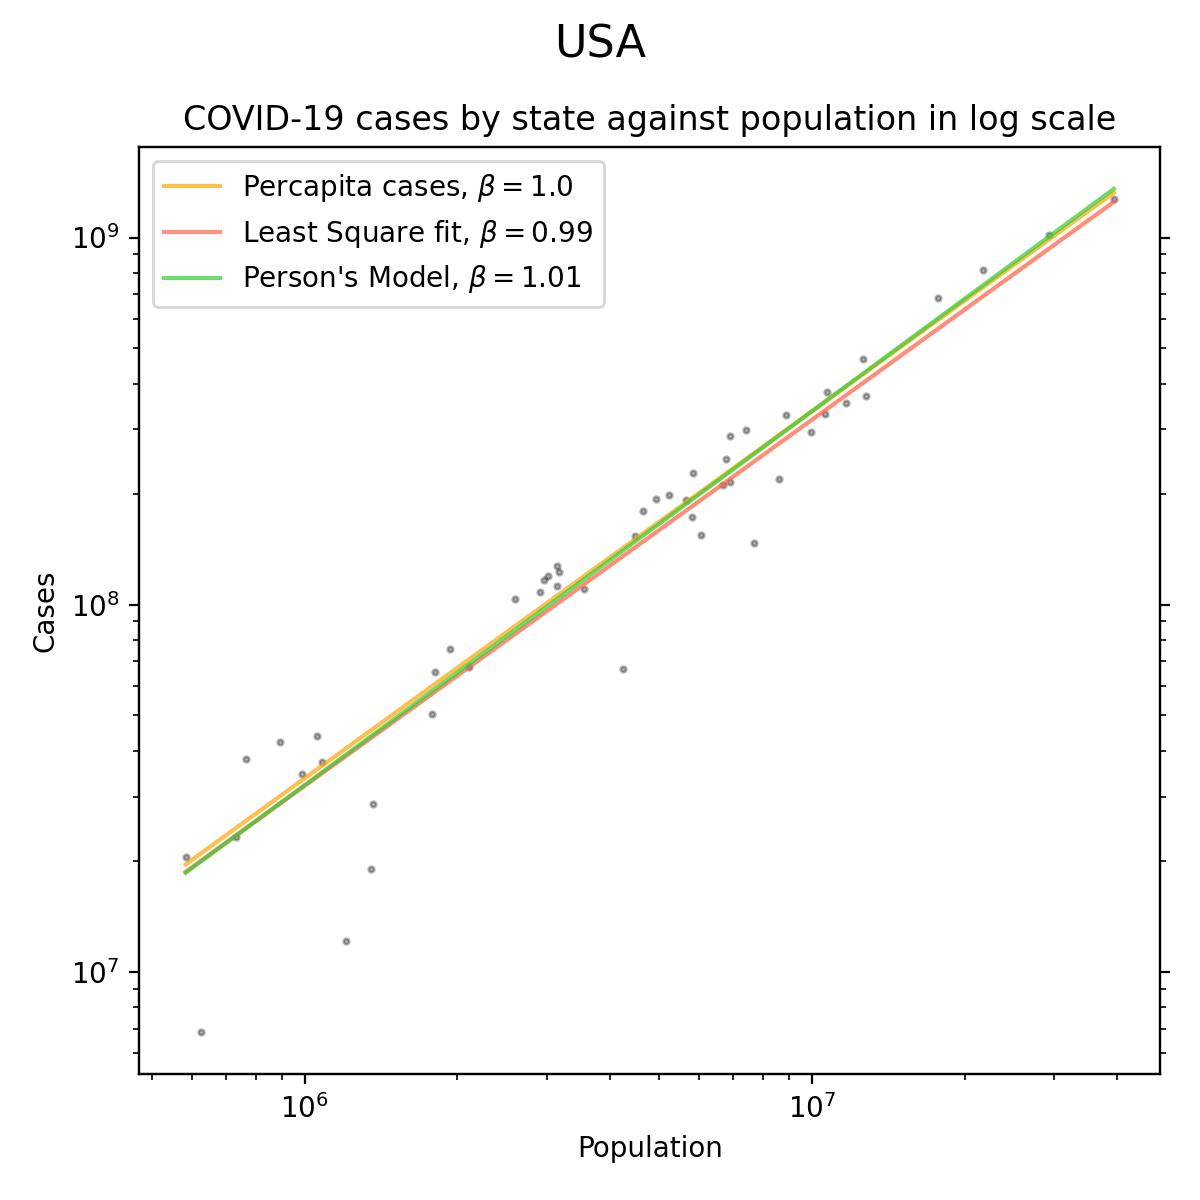

In [160]:
plot_results('USAbyStates')

<IPython.core.display.Javascript object>


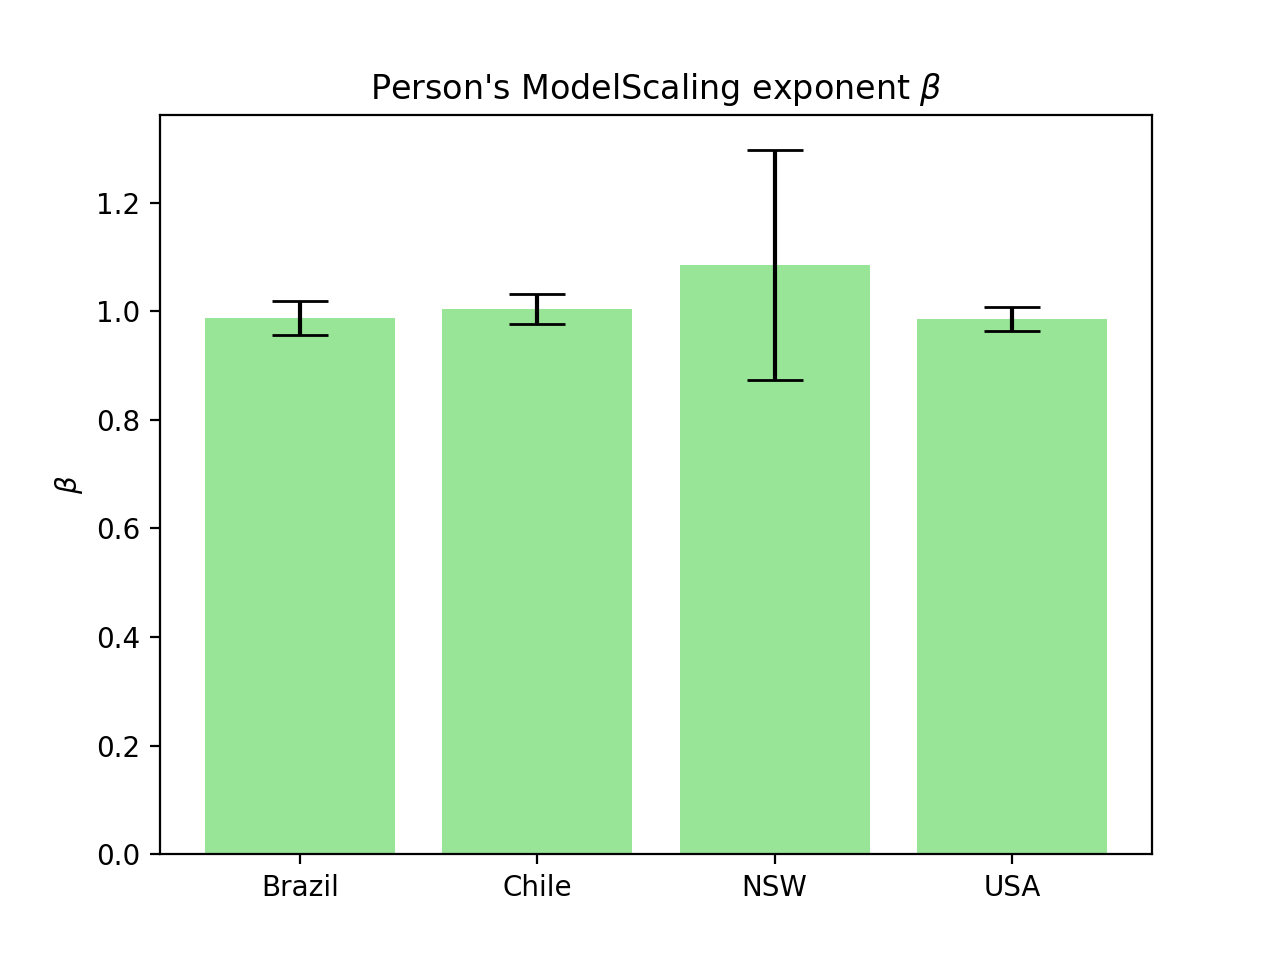

In [51]:
import matplotlib.patches as mpatches
results = {}
color = {'Brazil':'limegreen', 'NSW':'goldenrod', 'USA':'tomato', 'Chile':'royalblue'}
with open('results/results_brazil.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['Brazil'] = r
with open('results/results_chile.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['Chile'] = r
with open('results/results_NSW.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['NSW'] = r
with open('results/results_USA.pickle', 'rb') as handle:
    r = pickle.load(handle) 
    results['USA'] = r


for name, r in results.items():
    # Visualize the result
    beta_pop = r['Pop']['Beta +- error'][0]
    err_pop = r['Pop']['Beta +- error'][1]
    beta_ls = r['LS'][0]
    err_ls = r['LS'][1]
    plt.bar(name, beta_pop, yerr=err_pop, align='center', alpha=0.5, 
            ecolor='black', capsize=10, color='limegreen')
    #plt.bar(name, beta_pop, 'or', label=r"$\beta$Person's Model", color = 'limegreen')
    #plt.fill_between(name, beta_pop - err_pop, beta_pop + err_pop,
    #                 color='limegreen', alpha=0.3,)
    #plt.plot(name, beta_ls, 'or', label=r"$\beta$Least Square fit", color = 'tomato')
    #plt.fill_between(name, beta_ls - err_ls, beta_ls + err_ls,
    #                 color='tomato', alpha=0.3)

    
    plt.ylabel(r'$\beta$')
    plt.title(r"Person's ModelScaling exponent $\beta$")
    plt.savefig('beta_errors_pop', dpi = 1000)

<IPython.core.display.Javascript object>


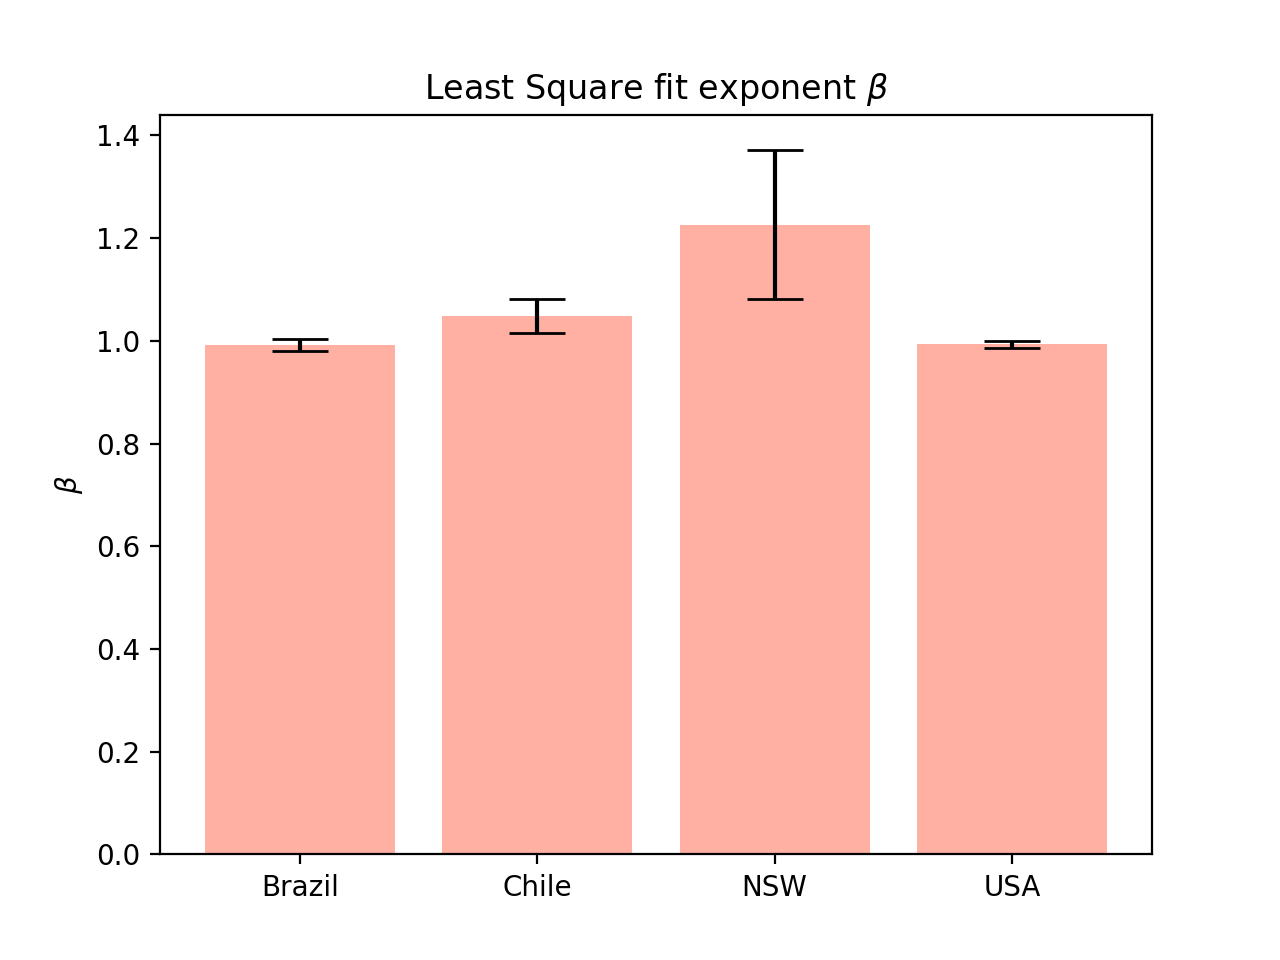

In [53]:
for name, r in results.items():
    # Visualize the result
    beta_pop = r['Pop']['Beta +- error'][0]
    err_pop = r['Pop']['Beta +- error'][1]
    beta_ls = r['LS'][0]
    err_ls = r['LS'][1]
    plt.bar(name, beta_ls, yerr=err_ls, align='center', alpha=0.5, 
            ecolor='black', capsize=10, color='tomato')
    plt.ylabel(r'$\beta$')
    plt.title(r"Least Square fit exponent $\beta$")
    plt.savefig('beta_errors_Least Square', dpi = 1000)

In [6]:
import matplotlib.patches as mpatches
results = {}
color = {'Brazil':'limegreen', 'NSW':'goldenrod', 'USA':'tomato', 'Chile':'royalblue'}
with open('results/results_brazil.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['Brazil'] = r
with open('results/results_chile.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['Chile'] = r
with open('results/results_NSW.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['NSW'] = r
with open('results/results_USA.pickle', 'rb') as handle:
    r = pickle.load(handle) 
    results['USA'] = r
    
for name, r in results.items():
    # Visualize the result
    beta_pop = r['Pop']['Beta +- error'][0]
    err_pop = r['Pop']['Beta +- error'][1]
    beta_ls = r['LS'][0]
    err_ls = r['LS'][1]
    plt.bar(name, beta_ls, yerr=err_ls, align='center', alpha=0.5, 
            ecolor='black', capsize=10, color='limegreen')
    #plt.bar(name, beta_pop, 'or', label=r"$\beta$Person's Model", color = 'limegreen')
    #plt.fill_between(name, beta_pop - err_pop, beta_pop + err_pop,
    #                 color='limegreen', alpha=0.3,)
    #plt.plot(name, beta_ls, 'or', label=r"$\beta$Least Square fit", color = 'tomato')
    #plt.fill_between(name, beta_ls - err_ls, beta_ls + err_ls,
    #                 color='tomato', alpha=0.3)
    #red_patch = mpatches.Patch(color='tomato', label='Least Square')
    green_patch = mpatches.Patch(color='limegreen', label="Person's Model")
    handles = []
    handles.append(red_patch)
    handles.append(green_patch)
    plt.legend(handles=handles, loc='upper right')
    plt.ylabel(r'$\beta$')
    plt.title(r'Scaling exponent $\beta$')

In [8]:
r

{'Pop': {'Description': 'People model with free \\delta',
  'Beta +- error': (0.9852555631258568, 0.021593472750037604),
  'P-value': 0.0,
  'BIC': 1178106946.624186,
  'params': array([0.98525556])},
 'LS': (0.9934501405312025, 0.006751222137567295, -1.9072594639230154)}

In [13]:
r['Pop']['Beta +- error'][0] #beta Pop
r['Pop']['Beta +- error'][1] #error Pop
r['LS'][0] #beta LS
r['LS'][1] #error LS

0.9934501405312025

<IPython.core.display.Javascript object>


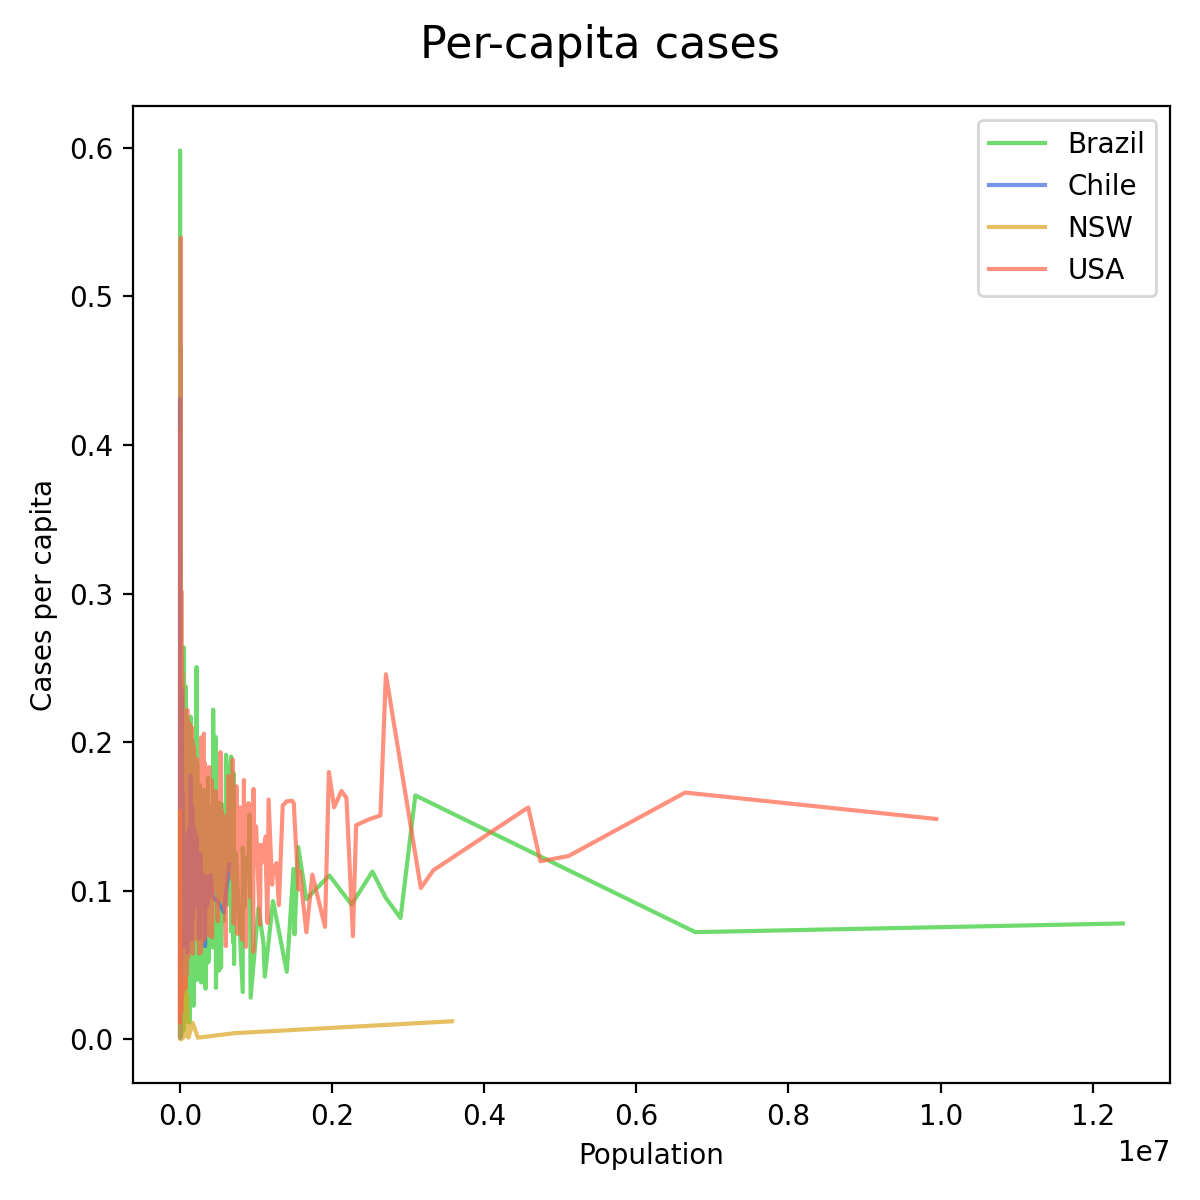

[     771      839      909 ...  3094325  6775561 12396372]
[    58    126     29 ... 507861 488298 965882]
[   137    211    264    282    287    572    661    681    694    810
    920   1021   1033   1233   1375   1583   1599   1746   1827   1983
   2515   2699   2806   3000   3114   3531   3611   3685   4006   4066
   4179   4201   4206   4306   4372   4381   4450   4654   4675   4940
   5020   5121   5275   5414   5447   5543   5696   5729   5828   5958
   6201   6261   6265   6330   6349   6765   6775   6814   6904   6989
   7223   7289   7323   7389   7405   7517   7632   7633   7639   7681
   7802   7831   7994   8092   8277   8298   8458   8601   8639   8783
   9083   9164   9192   9331   9426   9525   9546   9959  10032  10050
  10055  10222  10292  10429  10434  10553  10558  10833  11019  11049
  11248  11263  11264  11567  11787  11791  11841  11848  11880  11934
  11953  12165  12172  12188  12192  12334  12341  12633  12656  12793
  13164  13299  13657  13877  13884  140

In [85]:
x = {}
y = {}
color = {'Brazil':'limegreen', 'NSW':'goldenrod', 'USA':'tomato', 'Chile':'royalblue'}
with open('results/x_brazil.pickle', 'rb') as handle:
    x_brazil = pickle.load(handle)
    x['Brazil'] = x_brazil
with open('results/y_brazil.pickle', 'rb') as handle:
    y_brazil = pickle.load(handle)
    y['Brazil'] = y_brazil
       
with open('results/x_chile.pickle', 'rb') as handle:
    x_chile = pickle.load(handle)
    x['Chile'] = x_chile
with open('results/y_chile.pickle', 'rb') as handle:
    y_chile = pickle.load(handle)
    y['Chile'] = y_chile
with open('results/x_NSW.pickle', 'rb') as handle:
    x_NSW = pickle.load(handle)
    x['NSW'] = x_NSW
with open('results/y_NSW.pickle', 'rb') as handle:
    y_NSW = pickle.load(handle)
    y['NSW'] = y_NSW
with open('results/x_USA.pickle', 'rb') as handle:
    x_USA = pickle.load(handle)
    x['USA'] = x_USA
with open('results/y_USA.pickle', 'rb') as handle:
    y_USA = pickle.load(handle)
    y['USA'] = y_USA
        
fig, ax1 = plt.subplots(figsize=(6,6))
#plt.xscale("log")
#plt.yscale("log")
    
plt.xlabel("Population")
plt.ylabel("Cases per capita")

#plt.xscale("log")
#plt.yscale("log")
#slope, intercept = np.polyfit(np.log(x), np.log(x), 1)
#ax2.plot(x,x, '-', label = 'y = x, {}'.format(slope))
    
#x* total y/ total x
#Percapita = population of city[i] * (total cases)/(total population)
for name, var in x.items():
    x_v = x[name]
    print(x_v)
    y_v = y[name]
    print(y_v)
    plt.plot(x_v, y_v/x_v, label =name, alpha = 0.7, color = color[name])
    #plt.plot(x_v, x_v*(sum(y_v)/sum(x_v)), label =name, alpha = 0.7, color = color[name])
    
plt.suptitle('Per-capita cases', fontsize=16)
    #plt.title(title_name)
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


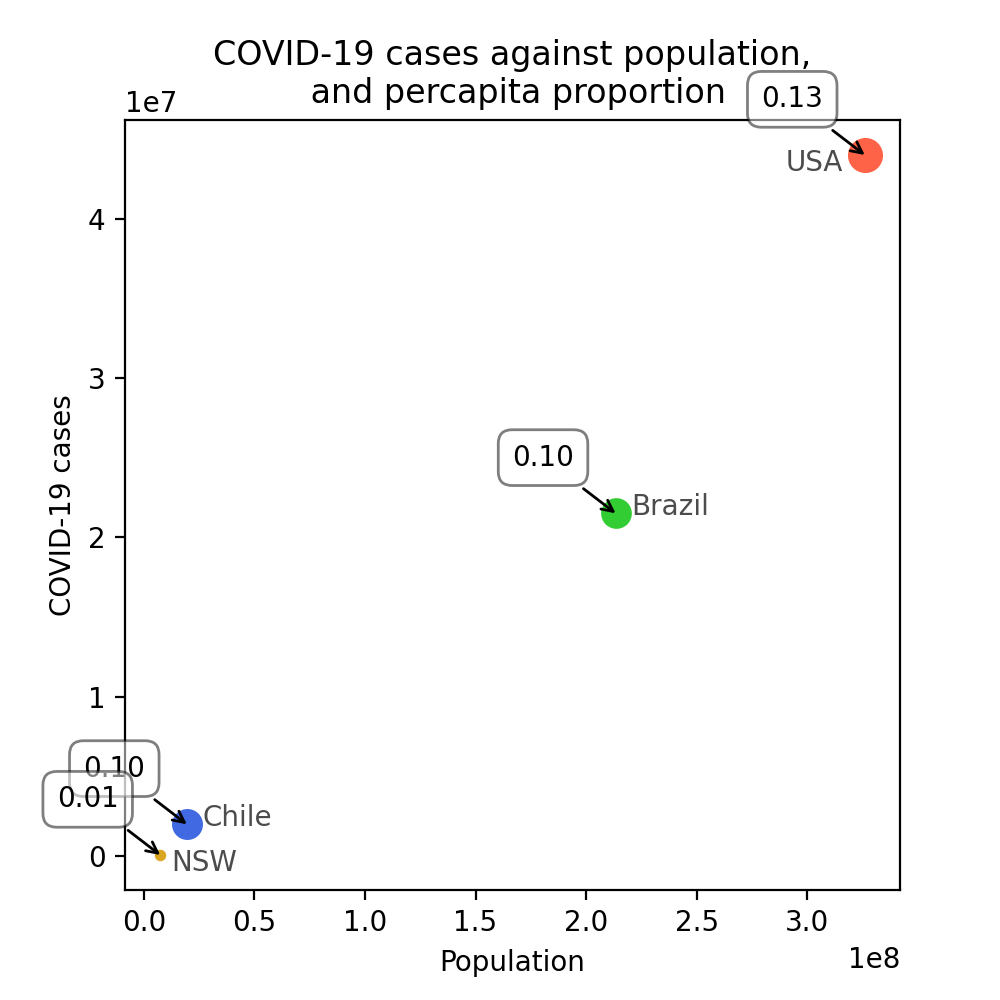

In [139]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
style = dict(size=10, color='black', alpha=0.7)
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
countries = ['Brazil', 'Chile', 'USA', 'NSW']
for name, var in x.items():
    x_v = sum(x[name])
    #print(x_v)
    y_v = sum(y[name])
    #print(y_v)
    per_capita = y_v/x_v
    #print(per_capita)
    plt.scatter(x_v, y_v, c=color[name], s=per_capita*1000, label = '{:.2f}'.format(per_capita))

    if name == 'NSW':
        ax.text(x_v+5000000, y_v -1000000, name, **style)
    if name == 'USA':
        ax.text(290000000, y_v -1000000, name, **style)
    if name == 'Brazil':
        ax.text(x_v+7000000, y_v -100000, name, **style)
    if name == 'Chile':
        ax.text(x_v+7000000, y_v -100000, name, **style)

plt.title('COVID-19 cases against population,\n and percapita proportion')
plt.xlabel('Population')
plt.ylabel('COVID-19 cases')
datacursor(formatter='{label}'.format, bbox=dict(fc='white'),
           display='multiple', draggable=True)
plt.show()

In [140]:
b = sum(y['USA']) 
b

43999305

In [141]:
sum(y['Brazil'])

21515341

In [142]:
x['USA'][0]

87

In [143]:
y['USA']

array([      1,       8,      16, ...,  629834, 1102649, 1474114])

In [145]:
sum(y['USA'])/sum(x['USA'])

0.13497244144376608

In [47]:
per_capita = sum(y_v)/sum(x_v)
per_capita

0.10086058096677133

In [49]:
x_v

array([     771,      839,      909, ...,  3094325,  6775561, 12396372])

<IPython.core.display.Javascript object>


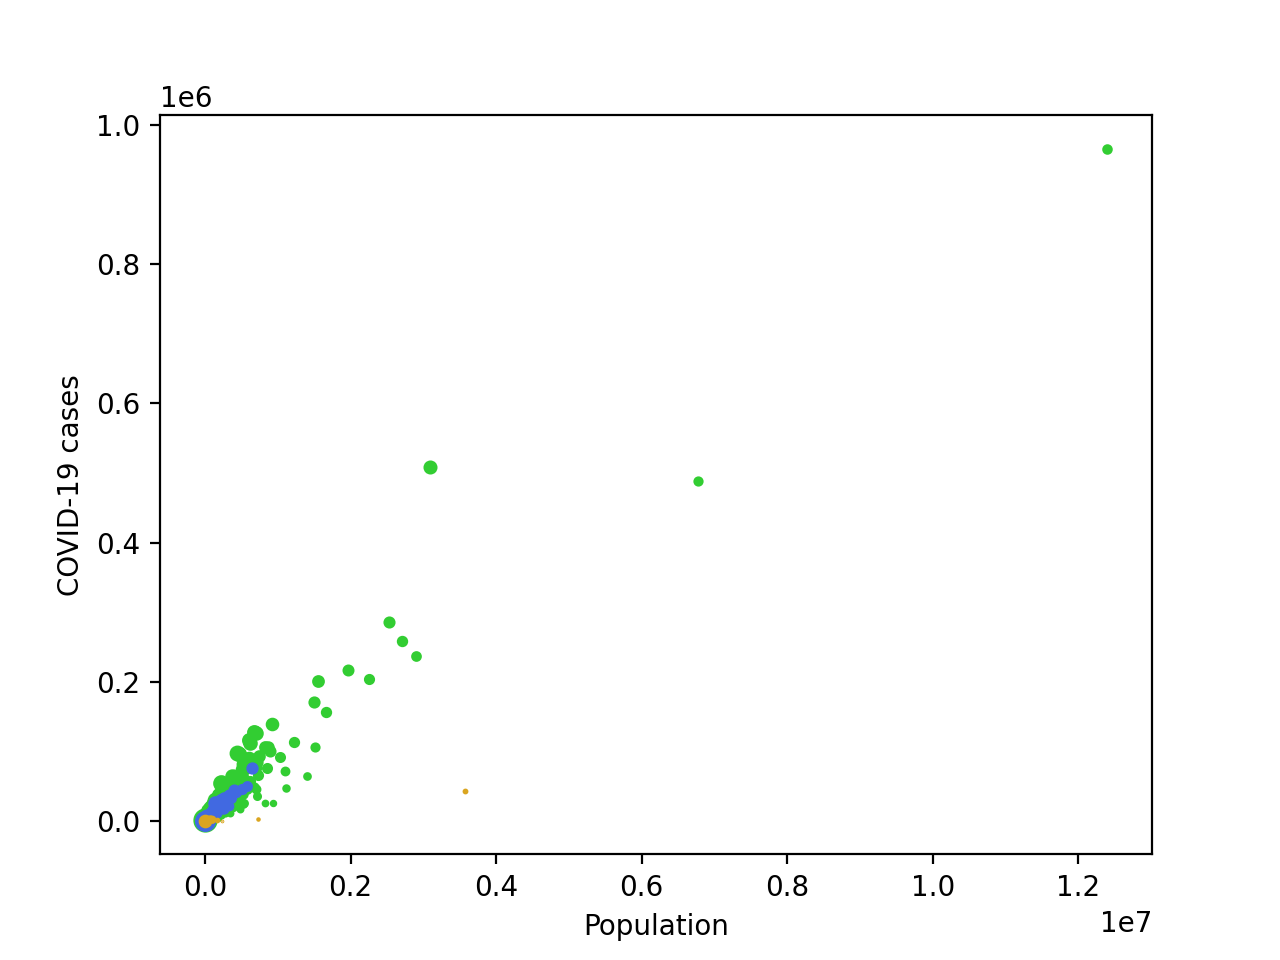

In [83]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_subplot(111)
countries = ['Brazil', 'Chile', 'USA', 'NSW']
for name, var in x.items():
    if name == 'USA':
        continue
    for n in range(len(x[name])):
        x_v = x[name][n]
        #print(x_v)
        y_v = y[name][n]
    #print(y_v)
        per_capita = y_v/x_v
    #print(per_capita)
        plt.scatter(x_v, y_v, c=color[name], s=per_capita*100, label = name)#per_capita)
#x_v = sum(x['Chile'])
#y_v = sum(y['Chile'])
#print(x_v, y_v)    
#ax.scatter(x, y, c=color[name], s=1)#per_capita)    
#ax.set_xlim(5, 45)
#ax.set_ylim(60, 85)
plt.xlabel('Population')
plt.ylabel('COVID-19 cases')
#plt.legend()

plt.show()

In [147]:
with open('results/results_NSW.pickle', 'rb') as handle:
    results = pickle.load(handle)

In [149]:
results['LS'][0] + results['LS'][0][1]

(1.225934185373245, 0.14475935154933758, -7.871618339394747)

In [161]:
results['Pop']

{'Description': 'People model with free \\delta',
 'Beta +- error': (1.0844040449667502, 0.21165173593140127),
 'P-value': 0.0,
 'BIC': 658549.3124538743,
 'params': array([1.08440404])}

In [162]:
results['Pop']['Beta +- error'][1]

0.21165173593140127

In [56]:
results

{'Brazil': {'ln': {'Description': 'Log normal fluctuations with a general \\delta',
   'Beta +- error': (0.9932645375273514, 0.010421171654476827),
   'P-value': 1.0059300451972757e-230,
   'BIC': 87726.30753288353,
   'params': array([0.10916102, 0.99326454, 0.30013949, 2.0230528 ])},
  'ln_beta1': {'Description': 'Log normal fluctuations with \\beta = 1',
   'Beta +- error': (1.0, 0.0),
   'P-value': 4.409911823071604e-231,
   'BIC': 87718.79978416245,
   'params': array([0.10243731, 1.        , 0.29217126, 2.02685582])},
  'ln_deltaf': {'Description': 'Log normal fluctuations with \\delta = 1',
   'Beta +- error': (0.9919601958731407, 0.011220058826841163),
   'P-value': 9.73658554288189e-230,
   'BIC': 87719.01301393252,
   'params': array([0.11052093, 0.9919602 , 0.35442441, 2.        ])},
  'Gauss': {'Description': 'Gaussian fluctuations with free \\delta',
   'Beta +- error': (0.9965646656637354, 0.011694197030150752),
   'P-value': 2.9941366243878957e-196,
   'BIC': 87418.75344